In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\karth\\Documents\\intership_2025'

In [3]:
zip_path = r"C:\\Users\\karth\\Documents\\intership_2025/PRCP-1015-EquakeDamagePred (1) - Copy.zip"

In [4]:
data1=pd.read_csv('train_labels.csv')
data2=pd.read_csv('train_values.csv')
data=pd.merge(data2,data1[['building_id','damage_grade']], on='building_id')
data


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [5]:
data.info()# Categorical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [11]:
data.isnull().sum()


building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Number of buildings with low damage is: 148259
Number of bulidings with medium damge is: 87218
Number of buildings with complete distruction is : 25124


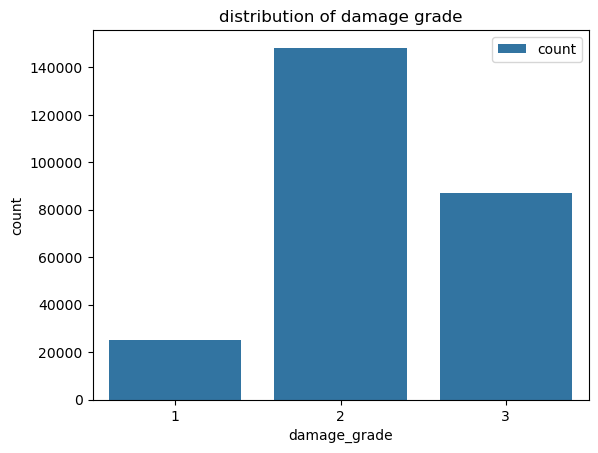

In [13]:
sns.countplot(data=data,x='damage_grade',label=('count'))
low_damage,medium_damage,complete_distruction=data['damage_grade'].value_counts()
plt.title('distribution of damage grade')
print('Number of buildings with low damage is:',low_damage)
print('Number of bulidings with medium damge is:',medium_damage)
print('Number of buildings with complete distruction is :',complete_distruction) 

Text(0.5, 1.0, 'Building Damage by Number of Floors')

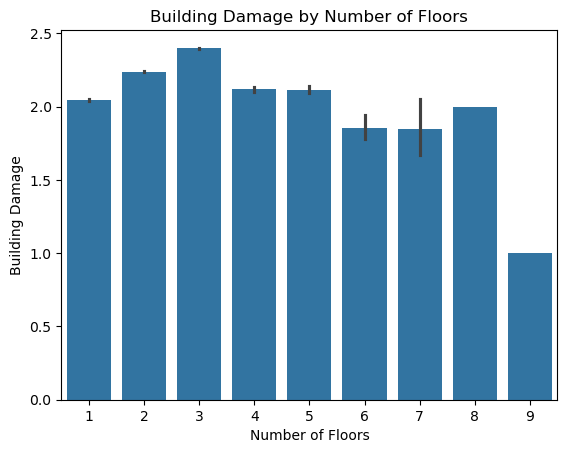

In [15]:
sns.barplot(x='count_floors_pre_eq',y='damage_grade',data=data)
plt.xlabel('Number of Floors')
plt.ylabel('Building Damage')
plt.title('Building Damage by Number of Floors')

In [17]:
data['has_secondary_use_hotel'].unique()

array([0, 1], dtype=int64)

In [19]:
count_ones = data['has_secondary_use_hotel'].sum()
count_ones

8763

In [21]:
value_counts = data['has_secondary_use_hotel'].value_counts()
print('number of ones in "has_secondary_use_hotel":',value_counts.get(0,0))

number of ones in "has_secondary_use_hotel": 251838


Text(0.5, 1.0, 'Building Damage by legal_ownership_status ')

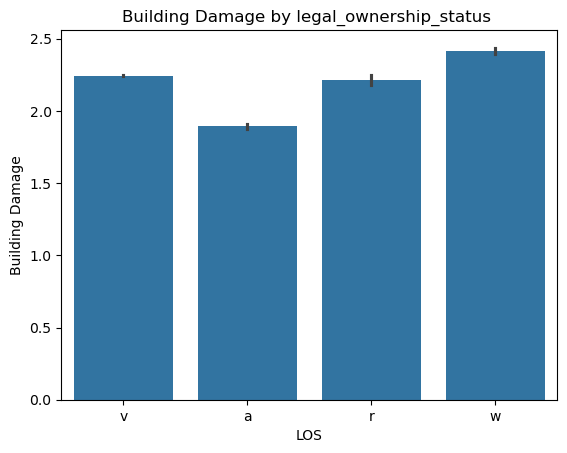

In [23]:
sns.barplot(x='legal_ownership_status',y='damage_grade',data=data)
plt.xlabel('LOS')
plt.ylabel('Building Damage')
plt.title('Building Damage by legal_ownership_status ')

Text(0.5, 1.0, 'distribution of land surface condition')

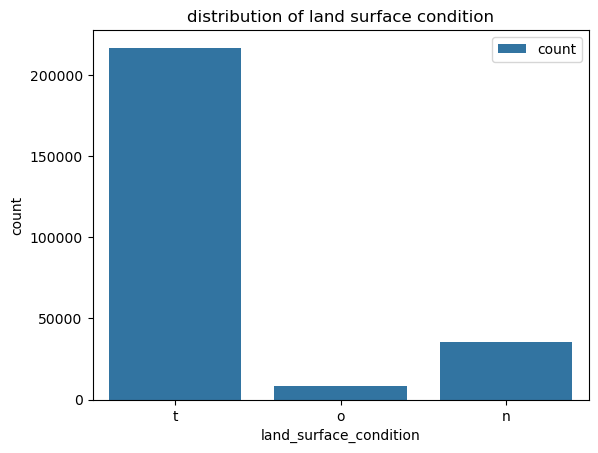

In [24]:
sns.countplot(data=data,x='land_surface_condition',label=('count'))
plt.title('distribution of land surface condition')

Text(0.5, 1.0, 'Building Damage by land_surface_condition')

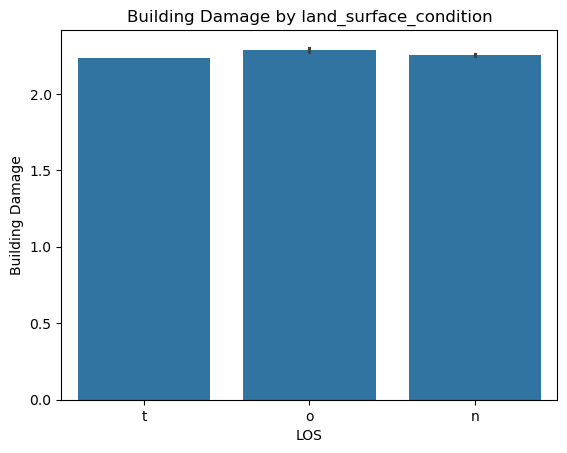

In [27]:
sns.barplot(x='land_surface_condition',y='damage_grade',data=data)
plt.xlabel('LOS')
plt.ylabel('Building Damage')
plt.title('Building Damage by land_surface_condition')

Text(0.5, 1.0, 'Building Damage by foundation_type')

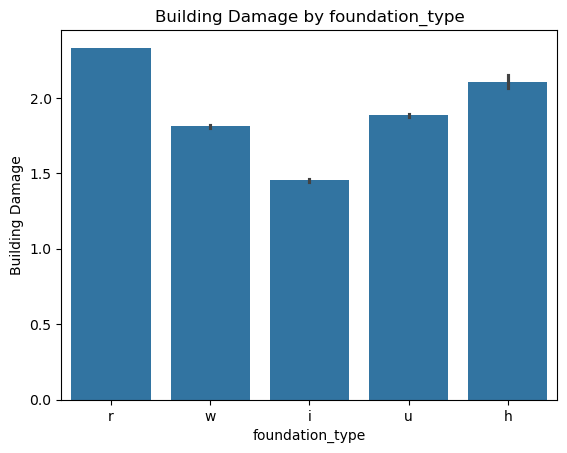

In [28]:
sns.barplot(x='foundation_type',y='damage_grade',data=data)
plt.xlabel('foundation_type')
plt.ylabel('Building Damage')
plt.title('Building Damage by foundation_type')

Text(0.5, 1.0, 'distribution of roof_type')

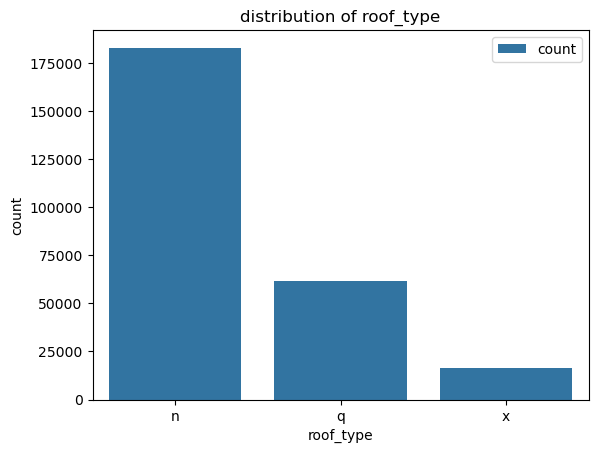

In [31]:
sns.countplot(data=data,x='roof_type',label=('count'))
plt.title('distribution of roof_type')

Text(0.5, 1.0, 'Building Damage by ground_floor_type')

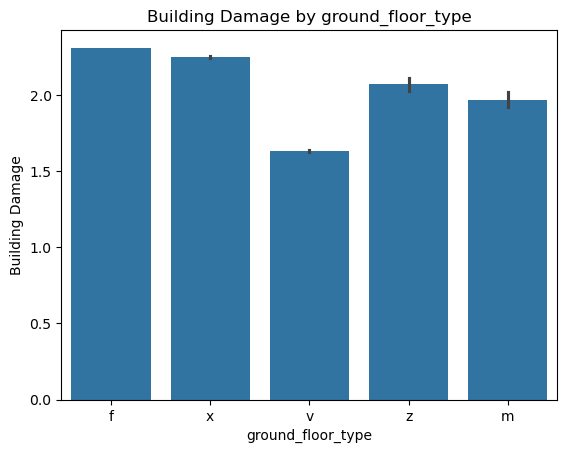

In [33]:
sns.barplot(x='ground_floor_type',y='damage_grade',data=data)
plt.xlabel('ground_floor_type')
plt.ylabel('Building Damage')
plt.title('Building Damage by ground_floor_type')

Text(0.5, 1.0, 'Building Damage by position ')

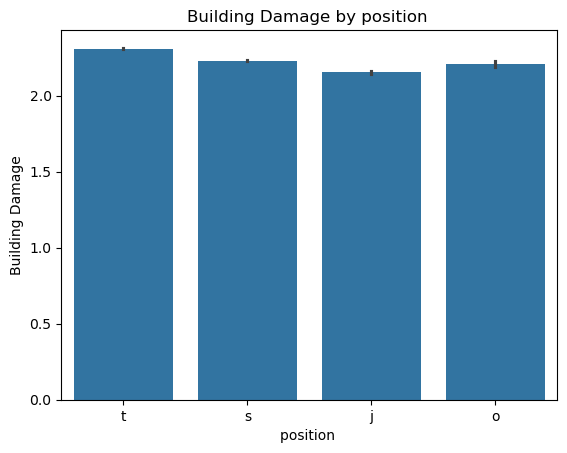

In [35]:
sns.barplot(x='position',y='damage_grade',data=data)
plt.xlabel('position ')
plt.ylabel('Building Damage')
plt.title('Building Damage by position ')

In [37]:
columns_to_drop = ["building_id", "legal_ownership_status", "count_families"]
data.drop(columns=columns_to_drop, inplace=True)

In [39]:
superstructure_columns = [
    "has_superstructure_adobe_mud", "has_superstructure_mud_mortar_stone",
    "has_superstructure_stone_flag", "has_superstructure_cement_mortar_stone",
    "has_superstructure_mud_mortar_brick", "has_superstructure_cement_mortar_brick",
    "has_superstructure_timber", "has_superstructure_bamboo",
    "has_superstructure_rc_non_engineered", "has_superstructure_rc_engineered",
    "has_superstructure_other"
]

# Create a new column for superstructure type
data["superstructure_type"] = data[superstructure_columns].idxmax(axis=1)

# Drop the original binary columns
data.drop(columns=superstructure_columns, inplace=True)


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   geo_level_1_id                 260601 non-null  int64 
 1   geo_level_2_id                 260601 non-null  int64 
 2   geo_level_3_id                 260601 non-null  int64 
 3   count_floors_pre_eq            260601 non-null  int64 
 4   age                            260601 non-null  int64 
 5   area_percentage                260601 non-null  int64 
 6   height_percentage              260601 non-null  int64 
 7   land_surface_condition         260601 non-null  object
 8   foundation_type                260601 non-null  object
 9   roof_type                      260601 non-null  object
 10  ground_floor_type              260601 non-null  object
 11  other_floor_type               260601 non-null  object
 12  position                       260601 non-nu

In [43]:
from sklearn.preprocessing import LabelEncoder

# One-hot encode categorical columns
categorical_columns = ["foundation_type", "ground_floor_type", "other_floor_type",
                       "roof_type", "position", "plan_configuration", "superstructure_type","land_surface_condition"]

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Label encode the target variable
le = LabelEncoder()
data["damage_grade"] = le.fit_transform(data["damage_grade"])


In [45]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["damage_grade"])  # Features
y = data["damage_grade"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-Numeric Columns:", non_numeric_cols)

Non-Numeric Columns: Index([], dtype='object')


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7080831142917442
              precision    recall  f1-score   support

           0       0.64      0.46      0.54      5170
           1       0.71      0.82      0.76     29487
           2       0.71      0.59      0.65     17464

    accuracy                           0.71     52121
   macro avg       0.69      0.62      0.65     52121
weighted avg       0.71      0.71      0.70     52121



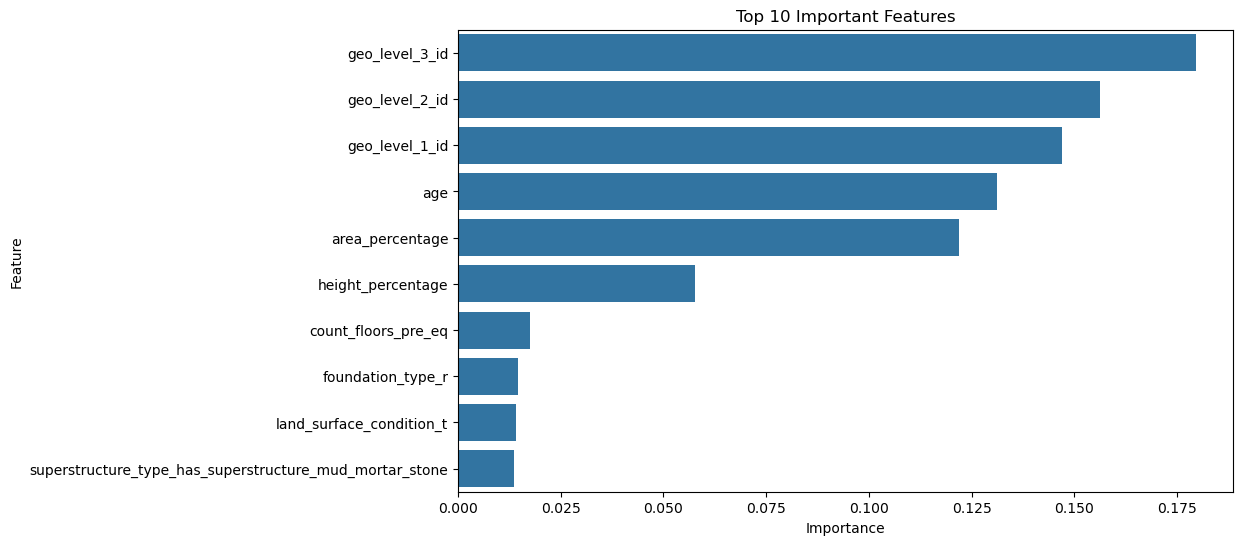

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [55]:
train_acc = rf_model.score(X_train_scaled, y_train)
test_acc = rf_model.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")


Training Accuracy: 0.98
Testing Accuracy: 0.71


In [57]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [59]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [61]:
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

In [ ]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
